In [236]:
from src.utilis import load_all_restaurants
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [237]:
df = load_all_restaurants("data\\raw")
df.head()

,title,description,n_reviews,stars_avg,price_range,extra_features,street,opening_hours,phone_number,reviews,extra_content,unique_id
0,Restaurante Abando,Restaurante de larga trayectoria con pinchos c...,3000,"4,3",€€,Tiene terraza· Tiene Wi-Fi· Sillas altas dispo...,"Colón de Larreátegui K., 31, Abando, 48009 Bil...","{'viernes': ['7:00–1:30'], 'sábado': ['7:00–1:...",944 24 57 79,['Agradable lugar para comer tanto a la carta ...,['Abando Bar Restaurante. Colón de Larreátegui...,"Restaurante Abando | Colón de Larreátegui K., ..."
1,"Bar-Restaurante ""La Roca""",NaN,11000,"4,2",20-30€,Ideal para ver deportes· Sillas altas disponib...,"Archivo Histórico Provincial, Ercilla Kalea, 1...","{'sábado': ['12:00–24:00'], 'domingo': ['Cerra...",944 25 50 09,"['No suelo poner reseñas, pero esta vez, lo me...",['... café baristas cerveza metodología de tir...,"Bar-Restaurante ""La Roca"" | Archivo Histórico ..."
2,La Gavilla Bilbao,Restaurante funcional y acogedor que ofrece pl...,11000,"4,5",30-40€,NaN,"Colón de Larreátegui K., N.32, Abando, 48009 B...","{'sábado': ['12:00–24:00'], 'domingo': ['Cerra...",944 25 68 38,"['Veamos, sólo comí cuatro pinchos que estaban...",['Céntrico establecimiento que se ha puesto ba...,"La Gavilla Bilbao | Colón de Larreátegui K., N..."
3,La Kedada Bilbao,Bar restaurante de un hotel moderno y de pared...,54,"4,0",NaN,Tiene terraza· Tiene comedor privado· Tiene Wi-Fi,"Rodríguez Arias K., 66, Bajo, Abando, 48013 Bi...","{'sábado': ['19:00–23:00'], 'domingo': ['19:00...",944 41 31 00,['La comida esta rica lo que pasa que algunos ...,['El restaurante Bar Restaurante La Kedada est...,"La Kedada Bilbao | Rodríguez Arias K., 66, Baj..."
4,Restaurante Aralar,NaN,883,"4,3",10-20€,Se puede bailar· Tiene Wi-Fi· Sillas altas dis...,"Ibáñez de Bilbao Kalea, nº 16, Abando, 48001 B...","{'sábado': ['12:00–21:00'], 'domingo': ['Cerra...",944 23 09 52,['No me gusta mucho ir a sitios de ningún part...,['Calle Ibáñez de Bilbao 16 Sabin Etxea. 48001...,"Restaurante Aralar | Ibáñez de Bilbao Kalea, n..."


In [238]:
#Información sobre las columnas.
df.info()

#Filtrar las columnas que tienen nulos.
nulos_por_columna = df.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

print("Número de nulos por columna:")
print(columnas_con_nulos)

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 97
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           835 non-null    object
 1   description     223 non-null    object
 2   n_reviews       835 non-null    int64 
 3   stars_avg       835 non-null    object
 4   price_range     734 non-null    object
 5   extra_features  358 non-null    object
 6   street          767 non-null    object
 7   opening_hours   832 non-null    object
 8   phone_number    409 non-null    object
 9   reviews         835 non-null    object
 10  extra_content   835 non-null    object
 11  unique_id       835 non-null    object
dtypes: int64(1), object(11)
memory usage: 84.8+ KB
Número de nulos por columna:
description       612
price_range       101
extra_features    477
street             68
opening_hours       3
phone_number      426
dtype: int64


Eliminamos la columna "unique_id" ya que es para pruebas de la parte de scrapear.

In [239]:
df = df.drop(columns=['unique_id'])

Modificar columnas "description" y "extra_features". 

In [240]:
df['info'] = df['description'].astype(str) + ' ' + df['extra_features'].astype(str)+ ' ' + df['extra_content'].astype(str)+ ' ' + df['reviews'].astype(str)
df = df.drop(columns=['description', 'extra_features','extra_content','reviews'])

In [241]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\USUARIO.DESKTOP-
[nltk_data]     GN89KO5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\USUARIO.DESKTOP-
[nltk_data]     GN89KO5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
corpus = df['info'].astype(str).tolist()
stop_words = set(stopwords.words('spanish'))

processed_corpus = []

for document in corpus:
    words = [word.lower() for word in word_tokenize(document, language='spanish') if word.isalpha() and word.lower() not in stop_words and word.lower() != 'nan']

    processed_corpus.append(words)

#Reemplaza el contenido de la columna 'info' con su corpus correspondiente.
df['info'] = processed_corpus

print(df['info'])

0     [restaurante, larga, trayectoria, pinchos, com...
1     [ideal, ver, sillas, altas, admiten, perros, c...
2     [restaurante, funcional, acogedor, ofrece, pla...
3     [bar, restaurante, hotel, moderno, paredes, bl...
4     [puede, sillas, altas, disponibles, ibáñez, bi...
                            ...                        
90    [ene, gaztelu, pubs, bares, bilbao, opiniones,...
93    [sirve, comida, bar, bilbao, fotos, número, te...
94    [jaureguibeitia, ibarra, conocido, cocherito, ...
96    [multitud, recuerdos, enmarcados, decoran, tas...
97    [moderno, espacio, decorado, fotos, artistas, ...
Name: info, Length: 835, dtype: object


Ahora, cambiamos los valores de la columna "price_ranges". Primero, reemplazamos los nulos y los que tienen un símbolo de euro por el precio 10-20. Los que tienen doble símbolo de euro los cambiamos por 20-30.

In [243]:
df['price_range'] = df['price_range'].replace({
    'Más de 100€': '+100€',
    '€': '10-40€',
    '€€': '40-80€',
    '€€€': '+100€'
})

In [244]:
#Muestra la cantidad de valores únicos en la columna.
unique_prices = df['price_range'].value_counts()
print(unique_prices)

price_range
10-20€    265
1-10€     238
10-40€     71
40-80€     63
20-30€     47
+100€      17
1-20€      14
30-40€      6
10-30€      4
50-60€      4
20-40€      2
40-50€      2
70-80€      1
Name: count, dtype: int64


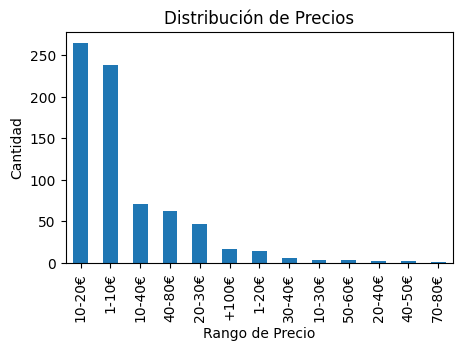

In [245]:
df['price_range'].value_counts().plot(kind='bar',figsize=(5, 3))

plt.title('Distribución de Precios')
plt.xlabel('Rango de Precio')
plt.ylabel('Cantidad')

plt.show()

Cambiamos el precio por 'barato','medio' o 'caro'.

In [247]:
#Función para asignar la categoría.
def categorize_price(price_range):
    # Verificar si el valor es un string
    if isinstance(price_range, str):
        # Dividir el rango de precios y obtener el último fragmento
        last_fragment = price_range.split('-')[-1]
        
        # Buscar números en el último fragmento
        numbers = re.findall(r'\d+', last_fragment)
        
        # Verificar si hay números encontrados
        if numbers:
            # Obtener el precio máximo del rango
            price_max = int(numbers[0])
            
            # Asignar categoría
            if price_max <= 10:
                return 'barato'
            elif price_max <= 20:
                return 'medio'
            else:
                return 'caro'
        else:
            # Manejar el caso donde no se encuentra ningún número
            return 'No válido'
    else:
        # Manejar el caso donde el valor no es un string
        return 'No válido'
    
    
df['price_range'] = df['price_range'].apply(categorize_price)

In [248]:
#Muestra la cantidad de valores únicos en la columna.
unique_prices = df['price_range'].value_counts()
print(unique_prices)

price_range
medio        279
barato       238
caro         217
No válido    101
Name: count, dtype: int64
